In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')


In [27]:
# Load the training and testing data
train_df = pd.read_csv("fraudTrain.csv")
test_df = pd.read_csv("fraudTest.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df.head()


Train shape: (1296675, 23)
Test shape: (555719, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [28]:
# Drop ID-like and high-cardinality string columns
columns_to_drop = ['Unnamed: 0', 'trans_num', 'trans_date_trans_time', 'cc_num', 
                   'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'dob', 'unix_time', 'merchant']

train_df = train_df.drop(columns=[col for col in columns_to_drop if col in train_df.columns])
test_df = test_df.drop(columns=[col for col in columns_to_drop if col in test_df.columns])


In [29]:
# Combine train and test temporarily for consistent encoding
combined_df = pd.concat([train_df, test_df], axis=0)

# Encode 'category' and 'gender'
combined_df = pd.get_dummies(combined_df, columns=['category', 'gender'], drop_first=True)

# Split back to train and test
train_df = combined_df.iloc[:len(train_df), :]
test_df = combined_df.iloc[len(train_df):, :]


In [30]:
X_train = train_df.drop('is_fraud', axis=1)
y_train = train_df['is_fraud']

X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']


In [31]:
# Scale only numeric columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [32]:
print("----- Logistic Regression -----")
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


----- Logistic Regression -----
Accuracy: 0.9955589065696872
ROC AUC: 0.49970825941969815
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



In [33]:
print("----- Decision Tree -----")
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


----- Decision Tree -----
Accuracy: 0.996224710690115
ROC AUC: 0.790985306811917
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.51      0.58      0.54      2145

    accuracy                           1.00    555719
   macro avg       0.75      0.79      0.77    555719
weighted avg       1.00      1.00      1.00    555719



In [34]:
print("----- Random Forest -----")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


----- Random Forest -----
Accuracy: 0.9975491210485875
ROC AUC: 0.769359164814515
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.76      0.54      0.63      2145

    accuracy                           1.00    555719
   macro avg       0.88      0.77      0.81    555719
weighted avg       1.00      1.00      1.00    555719



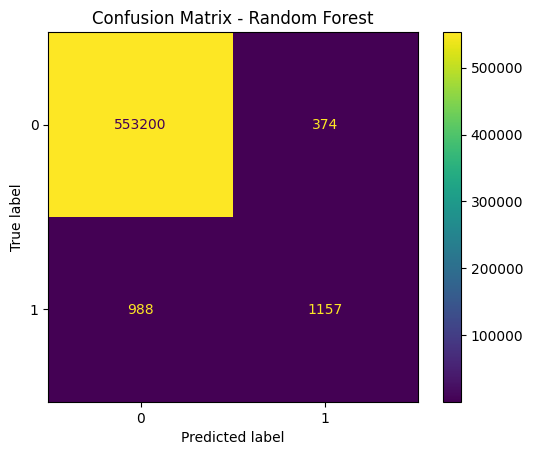

In [35]:
# Plot Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Confusion Matrix - Random Forest")
plt.show()
